In [1]:
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


## Input Image

[ 222.  223.  218.] (1, 224, 224, 3)


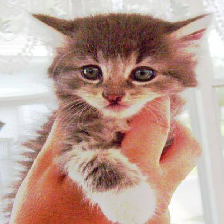

In [2]:
# Cat Image
cat_path = 'data/cat.100.jpg'
cat_img = image.load_img(cat_path, target_size=(224, 224))
cat_x = image.img_to_array(cat_img)
cat_x = np.expand_dims(cat_x, axis=0)

print cat_x[0][0][0], cat_x.shape
cat_img

[ 159.  149.  160.] (1, 224, 224, 3)


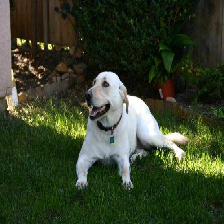

In [3]:
# Dog Image
dog_path = 'data/dog.9932.jpg'
dog_img = image.load_img(dog_path, target_size=(224, 224))
dog_x = image.img_to_array(dog_img)
dog_x = np.expand_dims(dog_x, axis=0)
print dog_x[0][0][0], dog_x.shape
dog_img

## ResNet50

In [4]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50, decode_predictions as decode_predictions_resnet50

In [5]:
model_resnet50 = ResNet50(weights='imagenet')
cat_x_resnet50 = preprocess_input_resnet50(cat_x)
dog_x_resnet50 = preprocess_input_resnet50(dog_x)


cat_preds = model_resnet50.predict(cat_x_resnet50)
dog_preds = model_resnet50.predict(dog_x_resnet50)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions_resnet50(cat_preds, top=3)[0])
print('Predicted:', decode_predictions_resnet50(dog_preds, top=3)[0])

('Predicted:', [(u'n02123045', u'tabby', 0.47289383), (u'n02124075', u'Egyptian_cat', 0.06696815), (u'n02123159', u'tiger_cat', 0.063380115)])
('Predicted:', [(u'n02100735', u'English_setter', 0.51505721), (u'n02111500', u'Great_Pyrenees', 0.21793801), (u'n02090622', u'borzoi', 0.087836929)])


In [6]:
np.max(cat_preds), cat_preds.shape, np.max(dog_preds), dog_preds.shape

(0.47289383, (1, 1000), 0.51505721, (1, 1000))

## VGG16

In [7]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from keras.applications.vgg16 import decode_predictions as decode_predictions_vgg16

In [8]:
model_vgg16 = VGG16(weights='imagenet', include_top=False)
cat_x_vgg16 = preprocess_input_vgg16(cat_x)
dog_x_vgg16 = preprocess_input_vgg16(dog_x)

# Extract features with VGG16
cat_features_vgg16 = model_vgg16.predict(cat_x_vgg16)
dog_features_vgg16 = model_vgg16.predict(dog_x_vgg16)

In [9]:
cat_features_vgg16.shape, dog_features_vgg16.shape

((1, 7, 7, 512), (1, 7, 7, 512))

In [10]:
# Predictions
model_vgg16_2 = VGG16(weights='imagenet')

cat_preds_vgg16 = model_vgg16_2.predict(cat_x_vgg16)
dog_preds_vgg16 = model_vgg16_2.predict(dog_x_vgg16)

print('Predicted:', decode_predictions_vgg16(cat_preds_vgg16, top=3)[0])
print('Predicted:', decode_predictions_vgg16(dog_preds_vgg16, top=3)[0])

('Predicted:', [(u'n02123159', u'tiger_cat', 0.3464503), (u'n02123045', u'tabby', 0.29700094), (u'n02124075', u'Egyptian_cat', 0.15855722)])
('Predicted:', [(u'n02100735', u'English_setter', 0.50612885), (u'n02111500', u'Great_Pyrenees', 0.2159903), (u'n02090622', u'borzoi', 0.11015905)])


## VGG19

In [11]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19, decode_predictions as decode_predictions_vgg19
from keras.models import Model

In [12]:
# Extract features from an arbitrary intermediate layer with VGG19
base_model_vgg19 = VGG19(weights='imagenet')
model_vgg19 = Model(
    inputs=base_model_vgg19.input, 
    outputs=base_model_vgg19.get_layer('block4_pool').output)

cat_x_vgg19 = preprocess_input_vgg19(cat_x)
dog_x_vgg19 = preprocess_input_vgg19(dog_x)

cat_block4_pool_features = model_vgg19.predict(cat_x_vgg19)
dog_block4_pool_features = model_vgg19.predict(dog_x_vgg19)

In [13]:
cat_block4_pool_features.shape, dog_block4_pool_features.shape

((1, 14, 14, 512), (1, 14, 14, 512))

In [15]:
# Predictions
model_vgg19_2 = Model(
    inputs=base_model_vgg19.input,
    outputs=base_model_vgg19.get_layer('predictions').output)

cat_preds_vgg19_2 = model_vgg19_2.predict(cat_x_vgg19)
dog_preds_vgg19_2 = model_vgg19_2.predict(dog_x_vgg19)

print('Predicted:', decode_predictions_vgg16(cat_preds_vgg19_2, top=3)[0])
print('Predicted:', decode_predictions_vgg16(dog_preds_vgg19_2, top=3)[0])

('Predicted:', [(u'n02123045', u'tabby', 0.53412187), (u'n02123159', u'tiger_cat', 0.31377554), (u'n02124075', u'Egyptian_cat', 0.068579435)])
('Predicted:', [(u'n02111500', u'Great_Pyrenees', 0.64753211), (u'n02099712', u'Labrador_retriever', 0.18218312), (u'n02104029', u'kuvasz', 0.15366894)])


In [ ]:
## Inception V3

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19, decode_predictions as decode_predictions_vgg19
from keras.models import Model

model_inception = InceptionV3(weights='imagenet')
cat_x_inception = preprocess_input_resnet50(cat_x)
dog_x_inception = preprocess_input_resnet50(dog_x)


cat_preds = model_inception.predict(cat_x_inception)
dog_preds = model_inception.predict(dog_x_inception)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions_resnet50(cat_preds, top=3)[0])
print('Predicted:', decode_predictions_resnet50(dog_preds, top=3)[0])